In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [2]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Data_10Xv2.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/Interdataset-PMBC/Labels_10Xv2.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (2000, 6318)
shape of labels: (6318, 1)


In [3]:
X = X.T
print("shape of data now:", X.shape)
Y = Y['x']
print("shape of labels now:", Y.shape)

shape of data now: (6318, 2000)
shape of labels now: (6318,)


In [4]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(6318, 6)
shape of train set:  (5054, 2000)  and labels:  (5054, 6) 

shape of test set:  (1264, 2000)  and labels:  (1264, 6) 

Shape of train and validation set to check for overfitting
shape of train set:  (4548, 2000)  and labels:  (4548, 6) 

shape of validation set:  (506, 2000)  and labels:  (506, 6)


## Linear SVM performance

shape of labels in training set:  (5054,)
shape of labels in test set:  (1264,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 10.20303225517273
Predict time: 0.016626834869384766
Accuracy of test set:  0.8939873417721519
F1-score of test set:  0.8942848401917995
Precision of test set: 0.8950819589227177
Recall of test set: 0.8939873417721519
Classification report of test set:
                          precision    recall  f1-score   support

       B cell - B-10Xv2       0.99      1.00      0.99       135
  CD4+ T cell - B-10Xv2       0.84      0.87      0.85       292
  CD8+ T cell - B-10Xv2       0.87      0.84      0.85       426
Megakaryocyte - B-10Xv2       0.96      0.92      0.94        86
     Monocyte - B-10Xv2       0.99      0.99      0.99       239
      NK cell - B-10Xv2       0.74      0.79      0.76        86

               accuracy                           0.89      1264
              macro avg       0.90      0.90      0.90      1264
           weighted avg       0.90      0.89      0.89      1264



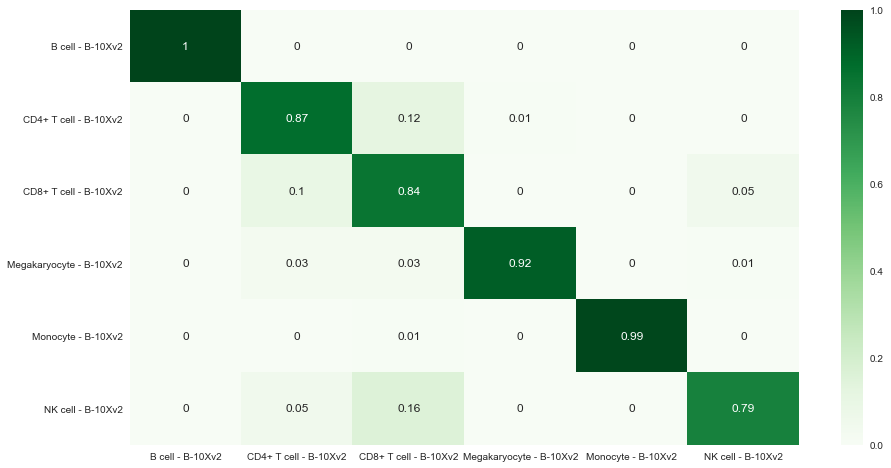

In [5]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


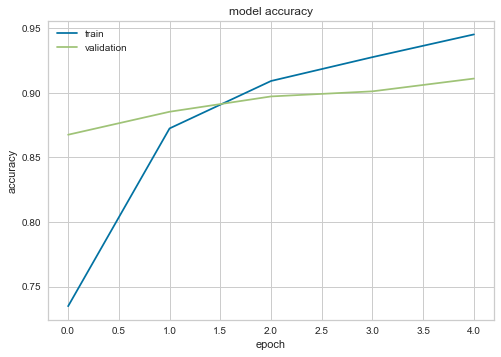

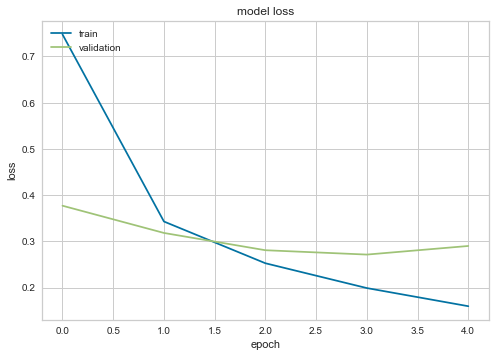

train the final model
Epoch 1/5
158/158 [==============================] - 1s 8ms/step - loss: 0.1493 - accuracy: 0.9448
Epoch 2/5
158/158 [==============================] - 1s 8ms/step - loss: 0.1216 - accuracy: 0.9590
Epoch 3/5
158/158 [==============================] - 1s 8ms/step - loss: 0.1037 - accuracy: 0.9646
Epoch 4/5
158/158 [==============================] - 1s 8ms/step - loss: 0.0886 - accuracy: 0.9707
Epoch 5/5
158/158 [==============================] - 1s 8ms/step - loss: 0.0709 - accuracy: 0.9776
Training time: 6.487032890319824
Predict time: 0.20965886116027832
The results are as follows:
Accuracy of test set:  0.9311708860759493
F1-score of test set:  0.9312747142342064
Precision of test set: 0.9327583952278067
Recall of test set: 0.9311708860759493
Classification report of test set:
                          precision    recall  f1-score   support

       B cell - B-10Xv2       1.00      1.00      1.00       135
  CD4+ T cell - B-10Xv2       0.87      0.94      0.90  

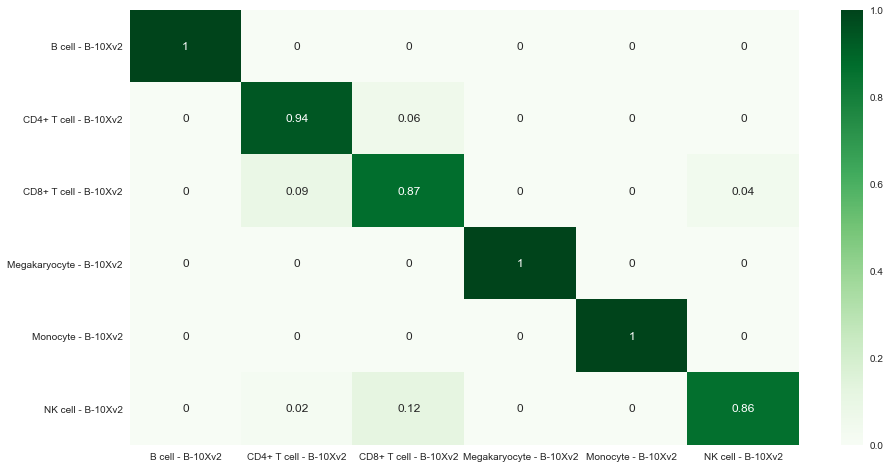

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


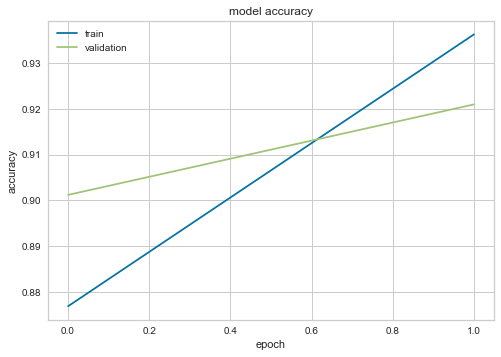

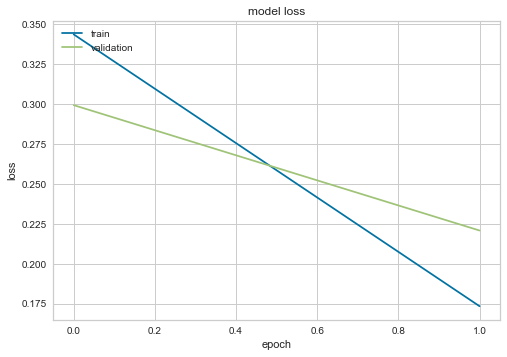

train the final model
Epoch 1/2
158/158 [==============================] - 27s 169ms/step - loss: 0.1275 - accuracy: 0.9573
Epoch 2/2
158/158 [==============================] - 29s 184ms/step - loss: 0.0953 - accuracy: 0.9677
Training time: 56.09488320350647
Predict time: 1.0938429832458496
The results are as follows:
Accuracy of test set:  0.9485759493670886
F1-score of test set:  0.9482425001237318
Precision of test set: 0.9486413990992989
Recall of test set: 0.9485759493670886
Classification report of test set:
                          precision    recall  f1-score   support

       B cell - B-10Xv2       0.99      1.00      1.00       135
  CD4+ T cell - B-10Xv2       0.92      0.93      0.93       292
  CD8+ T cell - B-10Xv2       0.92      0.93      0.93       426
Megakaryocyte - B-10Xv2       1.00      1.00      1.00        86
     Monocyte - B-10Xv2       1.00      1.00      1.00       239
      NK cell - B-10Xv2       0.93      0.80      0.86        86

               accurac

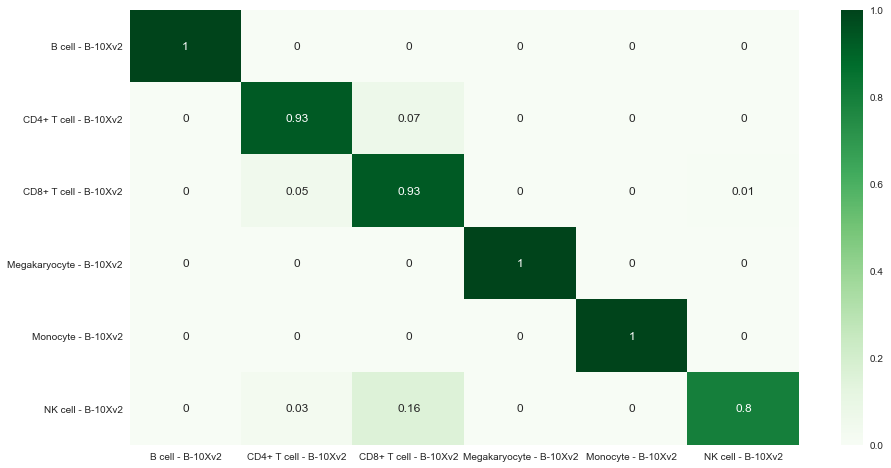

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)